In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
from IPython.display import Image

In [3]:
import math

import numpy as np; np.random.seed(13)
import matplotlib.pyplot as plt

In [4]:
import statistics
import seaborn as sns
import statsmodels.api as sm

import statsmodels.formula.api as smf

from scipy import stats
from numpy import random

**Процесс машинного обучения :**
- вопрос
- подготовка данных +  feature engineering
- машинное обучение 
- валидация 

**Модель** - объект, который на вход получает некторую информацию про наш объект, а возвращает предскажанное значение: класс, значение среднего, кластер 

**Обучение** - подбор параметров, которые минизируют ошибку (любую другую метрику)

**Машинное обучение. основная задача** - приобрети генерализированные знания,которые можно обобщить на новые объекты 

<div class="alert alert-warning">
<h2> Пандас </h2>
</div>

In [ ]:
# импортирует датасет о брилиантах
diamonds = pd.read_csv('data//diamonds.csv').sample(400).reset_index(drop = True)

- df.iloc[,] - братишка для отбора строк/столбцов по индексам, как в таблице

- df.loc[,] - братишка для отбора строк/столбцов по названиям

In [ ]:
# через iloc
diamonds.iloc[[2, 9], [1, 5]]

In [ ]:
# через iloc = integer location
diamonds.iloc[0:5,0:4]

In [ ]:
# через loc
diamonds.loc[:, ['carat' ,'depth']]

In [ ]:
# певые 8 хотя пишу 7 
diamonds.loc[:7] #если индекс представляет собой последовательность чисел от 0 с шагом 1

In [ ]:
# певые 8 хотя пишу 7 
# diamonds.iloc[:7]
diamonds.iloc[0:7]

In [ ]:
# возвращает серию с числом колонок каждого из типов
diamonds.dtypes.value_counts()

In [ ]:
# возвращает часть датафрэйма, куда были включены колонки с типами, указанными в include, или исключены колонки с типами, указанными в exclude
diamonds.select_dtypes(include=['int64', 'float64' ], exclude=['object']).head(1)

In [ ]:
# возвращает коллекцию с индексом всех строк
diamonds.index

In [ ]:
# фильтрация по нескольким условиям
diamonds[(diamonds['carat']>2) & (diamonds['depth']>2) ].head(2)

In [ ]:
titatnic = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')

In [ ]:
titatnic.head()

In [ ]:
# быстро найти долю
norm_data = pd.DataFrame(titatnic[['lunch']].value_counts(normalize= True)).reset_index()
norm_data

In [ ]:
students = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')
box = []
for i in students['lunch'].unique():
    data = students.query('lunch == @i').iloc[0:, -3:]
    mean_ = data.describe().iloc[1]
    variance = data.describe().iloc[2]**2
    col = data.describe().columns
    for j in range(len(mean_)):
        box.append([i, col[j], mean_[j], variance[j] ])
df = pd.DataFrame(box, columns = ['lunch', 'skill', 'mean', 'variance' ])

f, axes = plt.subplots(1, 2, figsize=(25,5))
for i, col in enumerate(['mean', 'variance']):
    sns.barplot(x = 'lunch', y =col, hue ='skill', data =df , ax= axes[i])

In [ ]:
# метод isin
students[students['parental level of education'].isin(["bachelor's degree", "master's degree"])].head(2)

In [ ]:
# фильтр
students.filter(like = 'score' , axis = 1).head()
#  Аргумент like отбирает те лэйблы, где встречается поданное значение
# Аргумент axis отвечает за то, какие лэйблы мы рассматриваем - индекс или колонки
# Аргумент regex отбирает лэйблы, подходящие к переданному паттерну
# Аргумент items отбирает лэйблы, переданные в коллекции в качестве значения
# Можно использовать только один из аргументов items, like, regex

In [ ]:
('students + g')[0].upper()+('students + g')[1:]

In [ ]:
# группировка без индекса сразу
students.groupby('gender' , as_index = False).agg({'math score':np.mean})

In [ ]:
# работа с мультииндексами
st = students.groupby(['gender', 'race/ethnicity'] , as_index = True).agg({'math score':np.mean, 'reading score':np.mean})
st.loc[[('female', 'group A'),
        ('female', 'group C') ]]

In [ ]:
# получить топ 5 математиков девуше и юношей
students.sort_values(['gender', 'math score'] , ascending = False) \
        .groupby(['gender']) \
        .head(1) \
        .reset_index(drop =True)

In [ ]:
# добавить сразу много столбцы
students= students.assign(total_score = students['math score'] + students['reading score'] + students['writing score'] ,
                         total_score_log = np.log(students['math score'] + students['reading score'] + students['writing score']))
students

In [ ]:
# чтобы убрать индекс  Unnamed: 0
dota =pd.read_csv('https://stepik.org/media/attachments/course/4852/accountancy.csv', 
                  index_col=0)

In [ ]:
# crosstab
pd.crosstab (dota['Executor'], dota['Type'])

In [ ]:
concentrations = pd.read_csv('http://stepik.org/media/attachments/course/4852/algae.csv')
mean_concentrations = concentrations.groupby(['genus']).mean()
round(concentrations.query('genus == "Fucus"').describe(), 2)

<div class="alert alert-warning">
<h2> Визуализация </h2>
</div>

In [ ]:
students.head(2)

In [ ]:
students.plot.scatter(x = 'math score', y = 'reading score')

In [ ]:
ax = sns.lmplot(x='math score', y='reading score', hue='gender', data=students, fit_reg = True)
ax.set_xlabels('Math score')
ax.set_ylabels('Reading score')

In [ ]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/income.csv')

In [ ]:
# построить линию
sns.lineplot(x=df.index, y=df.income)

df['income'].plot()

sns.lineplot(data=df)

plt.plot(df.index, df.income)

df.plot(kind='line')

df.plot()

df.income.plot()

In [ ]:
df = pd.read_csv("https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv", sep=",", index_col=0)

In [ ]:
lenths = [len(r.split(',')) for r in df.roles]
df['lenths'] = lenths
df[['lenths']].hist()

In [ ]:
df = pd.read_csv("https://stepik.org/media/attachments/course/4852/iris.csv", sep=",", index_col=0)

In [ ]:
for name in df.filter(like='al').columns:
    sns.distplot(df[name], label=name, hist=False)
plt.legend()

In [ ]:
for column in df:
    sns.kdeplot(df[column], label=f'размах: {column} ({df[column].max() - df[column].min():.1f})', shade=True)
plt.legend()

In [ ]:
1 if i not in [0, 1] else 0

In [ ]:
from itertools import product
order = [item for item in product([0, 1,], repeat=2)]


f, axes = plt.subplots(2, 2 , figsize = (25, 10))
for name , order in zip (df.columns, order):
    ax = axes[order[0], order[1]]
    sns.violinplot( y=name, data=df , ax =ax)
    ax.set_title(name)

In [ ]:

def corr(x, y, **kwargs):
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    # Add the label to the plot
    ax = plt.gca()
    if abs(coef) <= 0.25:
        fontsize = 14
    else:
        fontsize = round(30*abs(coef))
    ax.annotate(
        "%.2f" %coef, (0.5, 0.5), xycoords='axes fraction'
        , ha='center', va='center', fontsize=fontsize
    )
    

g = sns.PairGrid(df, diag_sharey=False, height=1.5)
# g.map_upper(sns.scatterplot)
g.map_upper(corr)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)

In [ ]:
# создать датафрейм через словарь 
my_data = pd.DataFrame({'type':['A', 'A', 'B', 'B'],'value': [10, 14, 12, 23]} )
# создать датафрейм через список списков
my_data = pd.DataFrame([['A', 10],['A',14],['B',12],['B', 23]], columns=['type','value'])
# через Series в пандасе
column_2=pd.Series([10,14,12,23])
column_1=pd.Series(['A','A','B','B'])
my_data=pd.DataFrame({'type':column_1, 'value':column_2})

In [ ]:
# В переменную с именем subset_1 сохраните только первые 10 строк и только 1 и 3 колонку.

%timeit subset_1 = concentrations.iloc[0:10, [0, 2]]

%timeit subset_1 = concentrations.iloc[:10,[0,2]]
%timeit subset_1=concentrations.drop([x for x in concentrations.columns if x not in ('group','genus')],\
                                     axis=1).head(10)

In [ ]:
# В переменную с именем subset_2 сохраните все строки кроме 1 и 5 и только 2 и 4 колонку.
%timeit subset_2 = concentrations[~concentrations.index.isin([0, 4])].iloc[0:, [1, 3]]
%timeit subset_2= concentrations.drop([0,4], axis=0).drop([x for x in concentrations.columns if x not in ('group','genus')], axis=1)
%timeit subset_2 = concentrations.iloc[lambda x: (x.index != 0) & (x.index != 4), [1, 3]]
%timeit subset_2 = concentrations.drop(index=[0, 4]).filter(regex='[24]')
%timeit subset_2 = concentrations.iloc[[x for x in range(concentrations.shape[0]) if x not in [0,4]],[1,3]]

Another common operation is the use of boolean vectors to filter the data. The operators are: | for or, & for and, and ~ for not. These must be grouped by using parentheses.

In [ ]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')

In [ ]:

# В переменную subset_1 сохраните только те наблюдения, у которых значения переменной V1
# строго больше 0, и значение переменной V3  равняется 'A'.


%timeit subset_1 = my_stat[(my_stat['V1'] > 0) & (my_stat['V3'] == 'A')]
%timeit subset_1 = my_stat.query("V1 > 0 and V3 == 'A'" )
%timeit subset_1 = my_stat.iloc[np.where((my_stat.V1.values>0)&(my_stat.V3.values=='A'))]

In [ ]:
# В переменную  subset_2  сохраните только те наблюдения, у которых значения переменной V2  не равняются 10, 
# или значения переменной V4 больше или равно 1.
%timeit subset_2 = my_stat[(my_stat['V2'] != 10) | (my_stat['V4'] >= 1)]
%timeit subset_2 = my_stat.query('V2 != 10 or V4 >= 4' )
%timeit subset_2 = my_stat.iloc[np.where((my_stat.V2.values!=10)|(my_stat.V4.values>=1))]


In [ ]:
'''
Теперь давайте преобразуем наши данные. В переменной my_stat лежат данные с которыми вам необходимо проделать следующее дейтвие. 
В этих данных (my_stat) создайте две новые переменных:

V5 = V1 + V4

V6 = натуральный логарифм переменной V2


'''

In [ ]:
%time my_stat = my_stat.assign( V5 = my_stat['V1'] + my_stat['V2'], \
                               V6 = np.log(my_stat['V2']))

In [ ]:
%time
V6 = np.log(my_stat['V2'])
my_stat.eval(
    '''V5 = V1 + V2
    V6 = @V6
    '''
, inplace=True)

In [ ]:
%time
my_stat['V5'] = my_stat['V1']+my_stat['V4']
my_stat['V6'] = my_stat.loc[:,'V2'].apply(lambda x: math.log(x))

<div class="alert alert-warning">
<h2> Soft </h2>
</div>

Тезисы из видео:

1. При построении карьеры в Data Science важно иметь готовые проекты, чтобы на собеседовании направить диалог по удобному для себя руслу, да и просто продемонстрировать свои конкурентные преимущества (хакатоны, работа через API). **Как вараинт быстро сделать проект для той компании в которую, желаешь устроиться, то есть point в том, что нужно понимать с чем рабоатет компания и вообще собеседование пройдет более предметно )**

2. Датасеты для анализа можно брать с kaggle, открытых источников, или просто собирать при помощи парсеров. причём последний вариант даёт плюс к компетенциям, поскольку вы покажете умение кодить и получать данные для своих моделей

3. Важны soft-skills

4. Важно и нужно уметь отвечать на вопросы не "Сколько?", а "Почему?". Поскольку получение цифр не даёт информации, а анализ этих цифр, анализ причин почему цифры именно такие, и как они сформировались - позволяет представить некоторую картину в процессах.

5. Работайте с API и хакатонами. Поднатаскайтесь в плане работы с проектами, пусть даже через API проекта. Пишите свои проекты и ссылайтесь на них в резюме.

<div class="alert alert-warning">
<h2> ML </h2>
</div>

In [ ]:
events_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip',
                          compression ='zip',
#                            = ['timestamp'],
#                           date_parser = lambda t: pd.Timestamp(int(t), unit = 's'), #tz = 'Europe/Moscow')
                          infer_datetime_format = True,
                         )

In [ ]:
events_data

In [ ]:
events_data['time'] = pd.to_datetime(events_data.timestamp , unit = 's')
events_data['day'] = events_data.time.dt.date
events_data.groupby('day') \
            .user_id.nunique().plot()

In [ ]:
events_data[events_data.action == 'passed'] \
        .groupby('user_id', as_index = False) \
        .agg({'step_id': 'count'}) \
        .rename(columns = {'step_id': 'passed_step'}).passed_step.hist()

In [ ]:
gap = events_data[['user_id', 'day', 'timestamp']] \
        .drop_duplicates(subset = ['user_id', 'day']) \
        .groupby('user_id')['timestamp'] \
        .apply(list) \
        .apply(np.diff)\
        .values

In [ ]:
gap_data = pd.Series(np.concatenate(gap)) / (24 *60*60)
gap_data.hist()

In [ ]:
# только 5% процентов пользователей вернется через 59 дней (2 месяца)
gap_data.quantile(0.95)

In [ ]:
gap_data.quantile(np.arange(0.9, 0.99, 0.01)).round(1)

In [ ]:
events_data['m'] = events_data.time.dt.month
events_data['y'] = events_data.time.dt.year

In [ ]:
data  = events_data.pivot_table(index = ['y', 'm' , 'user_id'],
                        values = 'action', aggfunc = 'count')

In [ ]:
data = data.reset_index()
insd = data.groupby(['user_id'])['action'].apply(list).index
value = data.groupby(['user_id'])['action'].apply(list).values

In [ ]:
df = pd.DataFrame(zip(insd, value) , columns = ['user', 'list'])
df['l']= df['list'].apply(lambda x: len(x))

In [ ]:
df.sort_values(by ='l')

# Решающие деревья

Деревья решений могут решать задачу классификации с произвольным числом классов.

Энтропия - мера беспорядка. Чем выше энтропия, тем хуже получается разделить классы

В бинарном классификации энтропия находится от 0 до 1. 
$$E(S) = -\Sigma p_i*log_2p_i$$
В бинарном классификации коэффициент Джини находится от 0 до 1. 
$$ Gini(S) =1-\Sigma p_i^2$$

IG = information gain (основатель Клаузиус)- меря снижения беспорядка в датасте достигнутая за счет разделения датасета на части
$$IG = \mathbb{E}(Y) - \mathbb{E}(Y|X)$$
$$E(Y∣X)= \frac{n_1}{N}*\mathbb{E}_1+\frac{n_2}{N}*\mathbb{E}_2$$
где $\mathbb{E}(Y|X)$ - словная интропия

Сплиты определяются на оснвоании information gain простоым перебором

**Как выбирается точка расщепления для непрерывных переменных в деревьях решений?**

Чтобы получить точку разделения, значения сортируются, а средние точки между соседними значениями оцениваются в терминах некоторой метрики, обычно  information gain или коэффициент джини. Для вашего примера предположим, что у нас есть четыре примера и значения переменной age равны (20,29,40,50). Средние точки между значениями (24.5,34.5,45) оцениваются, и используется любое разделение, которое дает наилучший прирост информации (или любую метрику, которую вы используете) на обучающих данных.

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mrow class="MJX-TeXAtom-ORD">
    <mtext class="MJX-tex-mathit" mathvariant="italic">Gini</mtext>
  </mrow>
  <mo>:</mo>
  <mrow class="MJX-TeXAtom-ORD">
    <mi class="MJX-tex-mathit" mathvariant="italic">G</mi>
    <mi class="MJX-tex-mathit" mathvariant="italic">i</mi>
    <mi class="MJX-tex-mathit" mathvariant="italic">n</mi>
    <mi class="MJX-tex-mathit" mathvariant="italic">i</mi>
  </mrow>
  <mo stretchy="false">(</mo>
  <mi>E</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mn>1</mn>
  <mo>&#x2212;<!-- − --></mo>
  <munderover>
    <mo>&#x2211;<!-- ∑ --></mo>
    <mrow class="MJX-TeXAtom-ORD">
      <mi>j</mi>
      <mo>=</mo>
      <mn>1</mn>
    </mrow>
    <mrow class="MJX-TeXAtom-ORD">
      <mi>c</mi>
    </mrow>
  </munderover>
  <msubsup>
    <mi>p</mi>
    <mi>j</mi>
    <mn>2</mn>
  </msubsup>
</math>

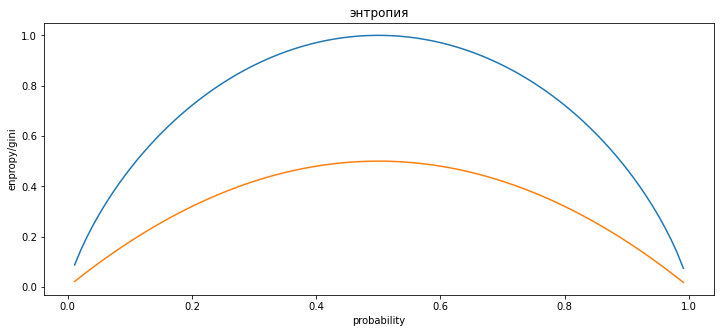

In [5]:
# Как ведет себя инропия на дисбалансе классов?
probability = [x for x in np.arange(0.011, 1, 0.01)]
enpropy = [-(i*np.log2(i)+(1-i)*np.log2(1-i))  for i in probability]
ginni = [1-(i**2+(1-i)**2)  for i in probability]
f, axes = plt.subplots(1, 1, figsize =(12, 5))
sns.lineplot(x =probability, y =enpropy , ax=axes)
sns.lineplot(x =probability, y =ginni , ax=axes)
axes.set_ylabel('enpropy/gini')
axes.set_xlabel('probability')
axes.set_title('энтропия')
plt.show()

In [6]:
from sklearn import tree

In [7]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 
                     'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 
                     'Y': [1, 1, 1, 1, 0, 0, 0, 0]})
data = pd.read_csv('https://stepik.org/media/attachments/course/4852/cats.csv',  index_col=0)

In [8]:
data

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик
8,1,1,1,котик
9,0,0,1,котик


In [9]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [10]:
X = data.iloc[:,0:3]
y = data.iloc[:, 3]

In [11]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [12]:
pip install graphviz

^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [13]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

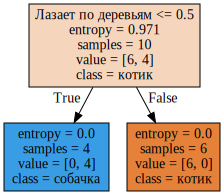

In [14]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X),
                                  class_names=['котик', 'собачка'],
                                   filled=True))

display(SVG(graph.pipe(format='svg')))

In [15]:
'''
задача про котов
'''

'\nзадача про котов\n'

In [16]:
E_sh_sob=(1/1)*math.log2((1/1)) - 0
E_sh_kot=-(4/9)*math.log2((4/9)) - (5/9)*math.log2((5/9))
E_gav_sob=0 - (5/5)*math.log2((5/5))
E_gav_kot=-(4/5)*math.log2((4/5)) - (1/5)*math.log2((1/5))
E_laz_sob=0 - (6/6)*math.log2((6/6))
E_laz_kot=-(4/4)*math.log2((4/4)) - 0

In [17]:
# выбираем наилучший сплит
E = -(4/10)*math.log2(4/10) - (6/10)*math.log2(6/10)
IG_sh = E - (1/10)*E_sh_sob - (9/10)*E_sh_kot
IG_gav = E - (5/10)*E_gav_sob - (5/10)*E_gav_kot
IG_laz = E - (6/10)*E_laz_sob - (6/10)*E_laz_kot

In [18]:
def enpopy(df, col = 'Вид'):
    cols = df[col].unique()
    N = df.shape[0]
    sum_ = 0
    for i in cols:
        n = df[df[col]==i].shape[0]
        sum_ += n/N * np.log2( n/N)
    return -sum_

In [19]:
# Вычисление IG (Information Gain) по каждому признаку
def IG(df, col = 'Вид'):
    N = df.shape[0]
    for group_name in df.columns[:-1]:
        S0 = enpopy(df, col ) #Начальная энтропия
        for v in df[group_name].unique():
            part_df = df[df[group_name] == v]
            n = part_df.shape[0]
            S0 -= (n/N * enpopy(part_df))
        print('Прирост информации (IG) при сплите признака {}:'.format(group_name), S0.round(2))

In [20]:
titatic = pd.read_csv('data//titanik_full_data.csv', sep = '\t')

In [21]:
titatic.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [90]:
# label encoding 
titatic.fillna(value = {'Age': titatic.Age.median()}, inplace = True)
titatic.dropna(subset = ['Fare'], inplace = True)
x = titatic.drop(['PassengerId', 'Survived', 'Name','Ticket', 'Cabin', 'Parch','SibSp', 'Fare'], axis = 1)
x = pd.get_dummies(x)
y =  titatic[['Survived']]

In [91]:
x

,Pclass,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,0,1,0,0,1
1,1,38.0,1,0,1,0,0
2,3,26.0,1,0,0,0,1
3,1,35.0,1,0,0,0,1
4,3,35.0,0,1,0,0,1
...,...,...,...,...,...,...,...
1304,3,28.0,0,1,0,0,1
1305,1,39.0,1,0,1,0,0
1306,3,38.5,0,1,0,0,1
1307,3,28.0,0,1,0,0,1


In [92]:
from sklearn.model_selection import train_test_split
# Разделение набора данных для обучения и тестирования. 67% данных используется для обучения модели, 
# а 33% — для тестирования производительности нашей модели.
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.33, random_state = 0)

In [93]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

clf.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy')

In [94]:
# точность accuracy
# accuracy мы и так предсказывали, что выжившие и у нас выжили, а не выжившие и у нас не выжили
clf.score(x, y)

0.8769113149847095

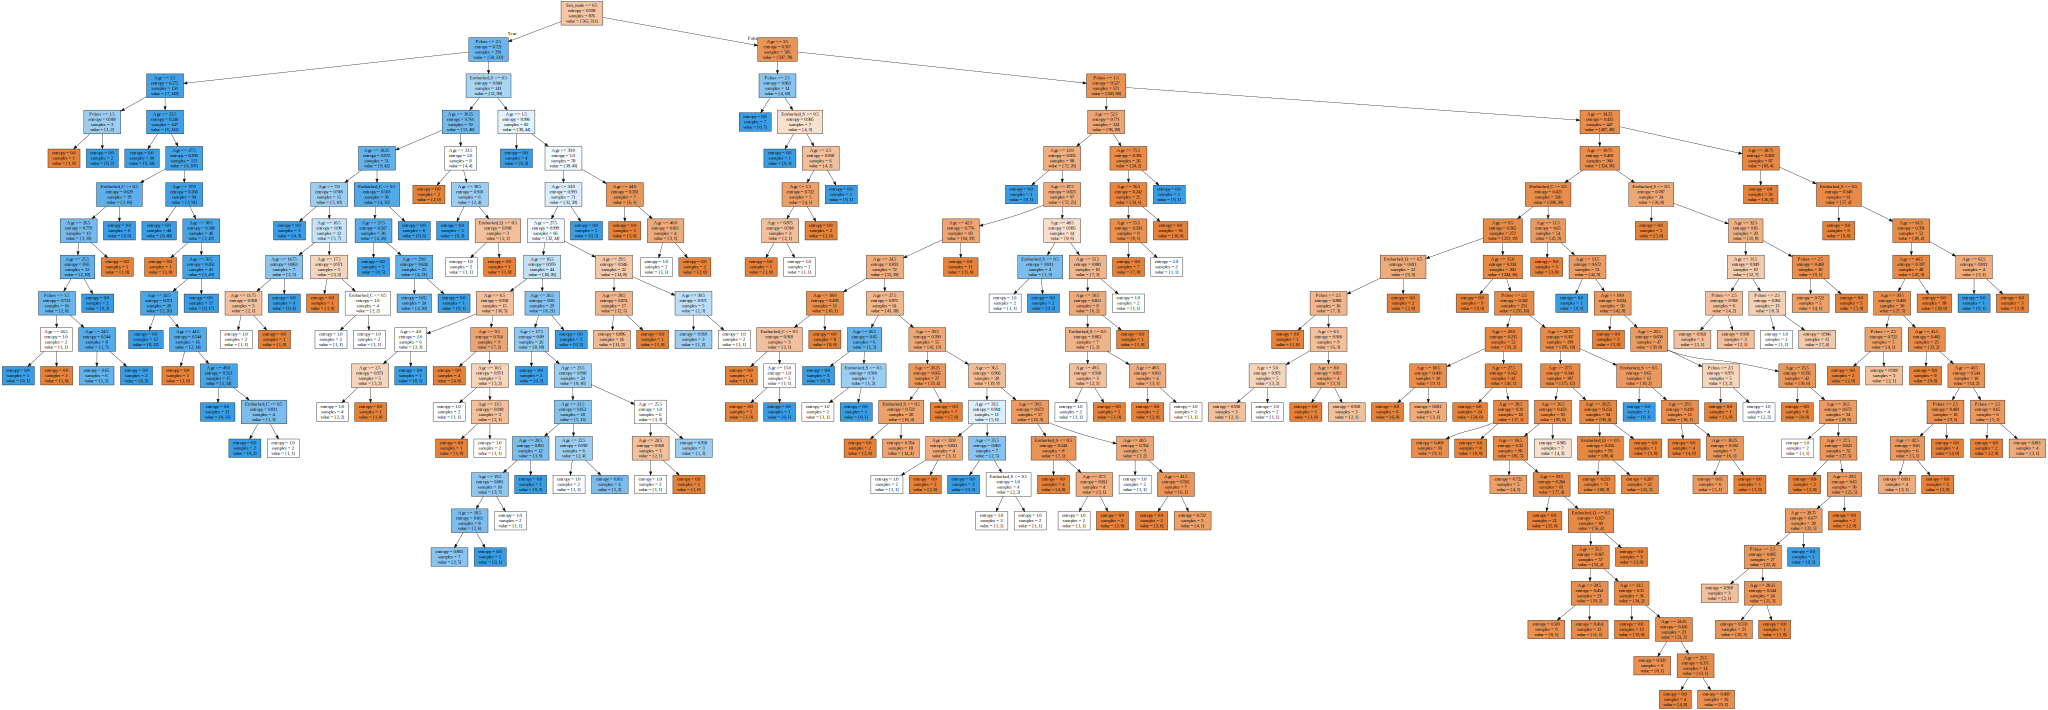

In [95]:
graph = Source(tree.export_graphviz(clf, out_file=None
                                    , feature_names=list(xtrain)
#                                     , class_names=['Sick', 'Healthy']
                                    , filled=True))

display(SVG(graph.pipe(format='svg')))

In [96]:
# predict output
y_pred= clf.predict(xtest)

In [97]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, \
                        recall_score, classification_report, confusion_matrix

print('\n clasification report:\n', classification_report(ytest, y_pred))


 clasification report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.85       249
           1       0.86      0.68      0.76       183

    accuracy                           0.82       432
   macro avg       0.83      0.80      0.81       432
weighted avg       0.82      0.82      0.81       432



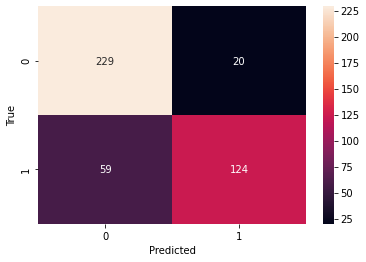

In [98]:
confusion_matrix_tbl = confusion_matrix(ytest, y_pred)
sns.heatmap(confusion_matrix_tbl, annot=True,  fmt='.4g',)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
plt.show()

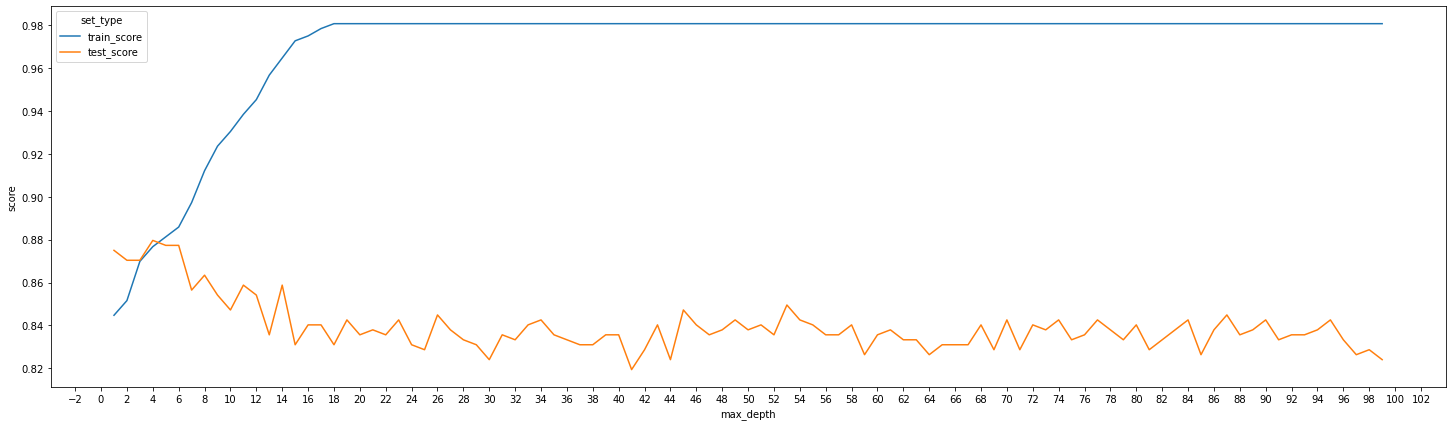

In [51]:
# переберем параметры глубины дерева
max_depth_values = range(1, 100)

train_score = []
test_score = []

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(xtrain, ytrain)
    train_score.append(clf.score(xtrain, ytrain))
    test_score.append(clf.score(xtest, ytest))
    
temp_score_data = pd.DataFrame({'max_depth': max_depth_values, 
                                'train_score': train_score, 
                                'test_score': test_score})

scores_data_long = pd.melt(temp_score_data,
                           id_vars = ['max_depth'],
                           value_vars = ['train_score','test_score'],
                           var_name = 'set_type',
                           value_name = 'score')


f, ax = plt.subplots(1, 1, figsize=(25, 7))
ax = sns.lineplot(data = scores_data_long, x='max_depth', y='score', hue='set_type')
num_ticks = 100
ax.locator_params(axis='x', nbins=num_ticks)

анализ графика:
train score:
- растет с увеличением глубины дерева
- что не всегда ведет к нахождению общих закономерностей в исследуемых данных

анализ графика:
- изначально невелик (модель еще не доучилась)
- на промежутке 3-5 score максимален (оптимальное состояние: закономерность с изученных данных переносится на новые)
- с дальнейшим увеличением глубины test score начинает падать (переход от недообученности к переобученности)

- Упрощение модели препятствует переобучению
- Уменьшить переобученность поможет больший объём данных
- Чем сложнее закономерности в данных, тем более сложная нужна модель для их поиска
- Переобученная модель - модель, погрязшая в особенностях тренировочного датасэта, вместо вникания в общие закономерности

<div class="alert alert-warning">
<h2>  GridSearchCV </h2>
</div>

Одно дерево - хорошо, но где гарантии, что оно является лучшим, или хотя бы близко к нему? Одним из способов найти более-менее оптимальный набор параметров дерева является перебор множества деревьев с разными параметрами и выбор подходящего.
Для этой цели существует класс GridSearchCV, перебирающий каждое из сочетаний параметров среди заданных для модели, обучающий её на данных и проводящих кросс-валидацию. После этого в аттрибуте .best_estimator_ храниться модель с лучшими параметрами.
Это применимо не только к деревьям, но и к другим моделям sklearn.

Есть специальный пакет GridSearchCV  для перебора параметров

при обучении дерева подбирает оптимальную глубину дерева, используя k-fold кросс-валидацию.

In [52]:
params = {'max_leaf_nodes': list(range(2, 20)),
          #минимальное число образцов(проб)в вершине для разделения 
          
        'min_samples_split': [2, 3, 4], 
        'criterion':['entropy', 'gini'], 
        'max_depth':[4, 6, 7, 9],
#          минимальное число проб для разделения
           'min_samples_leaf': range(1,10)
         }
from sklearn.model_selection import GridSearchCV
grid_search_cv = GridSearchCV(tree.DecisionTreeClassifier(random_state=42),
                                                      param_grid = params,
                                                      verbose=1,
#                                                Кол-во фолдов
                                                      cv=5)
grid_search_cv.fit(xtrain, ytrain)

Fitting 5 folds for each of 3888 candidates, totalling 19440 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [4, 6, 7, 9],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [53]:
# выводи наилучший вариант
grid_search_cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=7,
                       min_samples_leaf=8, random_state=42)

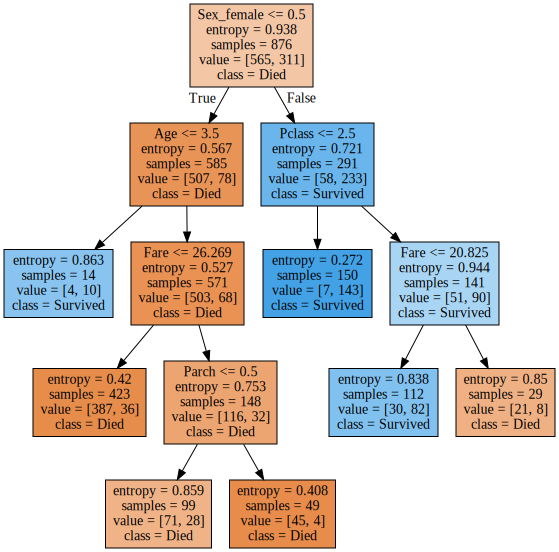

In [54]:
graph = Source(tree.export_graphviz(grid_search_cv.best_estimator_, out_file=None,
                                    feature_names=list(x), 
                                    class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [55]:
grid_search_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_leaf_nodes': 7,
 'min_samples_leaf': 8,
 'min_samples_split': 2}

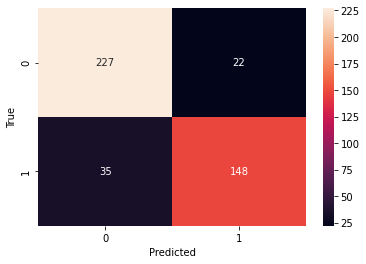

In [56]:
y_pred_grid = grid_search_cv.best_estimator_.predict(xtest)
confusion_matrix_tbl_grid = confusion_matrix(ytest, y_pred_grid)
sns.heatmap(confusion_matrix_tbl_grid, annot=True,  fmt='.4g',)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
plt.show()

<div class="alert alert-warning">
<h2>  ROC_AUC </h2>
</div>

In [57]:
from sklearn.metrics import precision_score

<AxesSubplot:>

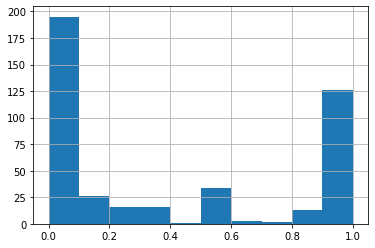

In [99]:
# вероятность отнесения к тому или иному классу
# первая цифра отнесение к отрицательному или положительному 
y_pred_proba = clf.predict_proba(xtest)[:, 1]
pd.Series(y_pred_proba).hist()

In [100]:
# посчитаем  precision_score без изменения вероятности отнесения к тому или иному классу
precision_score(ytest, y_pred)

0.8611111111111112

1) ROC (англ. receiver operating characteristic, рабочая характеристика приёмника) -кривая позволяет отобразить на одном графике результаты большого числа матриц ошибок (confusion matrix) в зависимости от различного уровня порога отсечения бинарных классов (хотя дерево решений может использоваться и для небинарной классификации)


2) AUC = area under the curve = интегральный показатель площади под кривой [0;1], AUC=0,5 - дерево не лучше случайного распределения

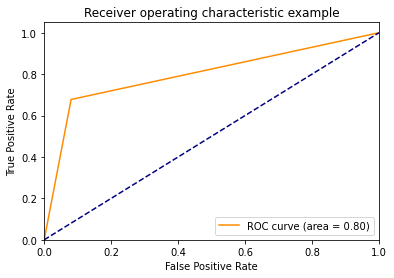

In [114]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ytest, y_pred)
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Высокий roc-auc говорит о том, что мы хорошо классифицием положительные классы и редко классфицием неправтльные 

<div class="alert alert-warning">
<h2> Кросс-валидация </h2>
</div>

Кросс-валидация или скользящий контроль — процедура эмпирического оценивания обобщающей способности алгоритмов. С помощью кросс-валидации эмулируется наличие тестовой выборки, которая не участвует в обучении, но для которой известны правильные ответы.

Так как в противном случае, обучение модели проиходит на одних и тех же данны (крутимся на одном и том же наборе данных (test), пока не подбирем правильный ответ по тестовый набор данных)

In [40]:
url = 'https://scikit-learn.org/stable/_images/grid_search_cross_validation.png'

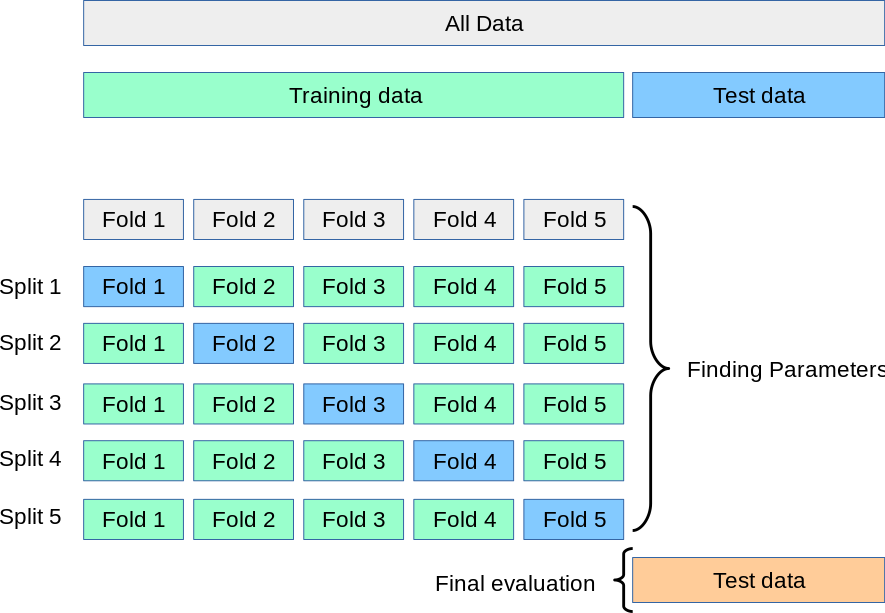

In [41]:
from PIL import Image as ImagePIL
from urllib.request import urlopen

image = ImagePIL.open(urlopen(url))
image

In [115]:
from sklearn.model_selection import cross_val_score
# оценки точно модели при на k-фолдах
cross_val_score(clf, xtest, ytest , cv =5)

array([0.88505747, 0.89655172, 0.80232558, 0.81395349, 0.79069767])

(0.0, 1.0)

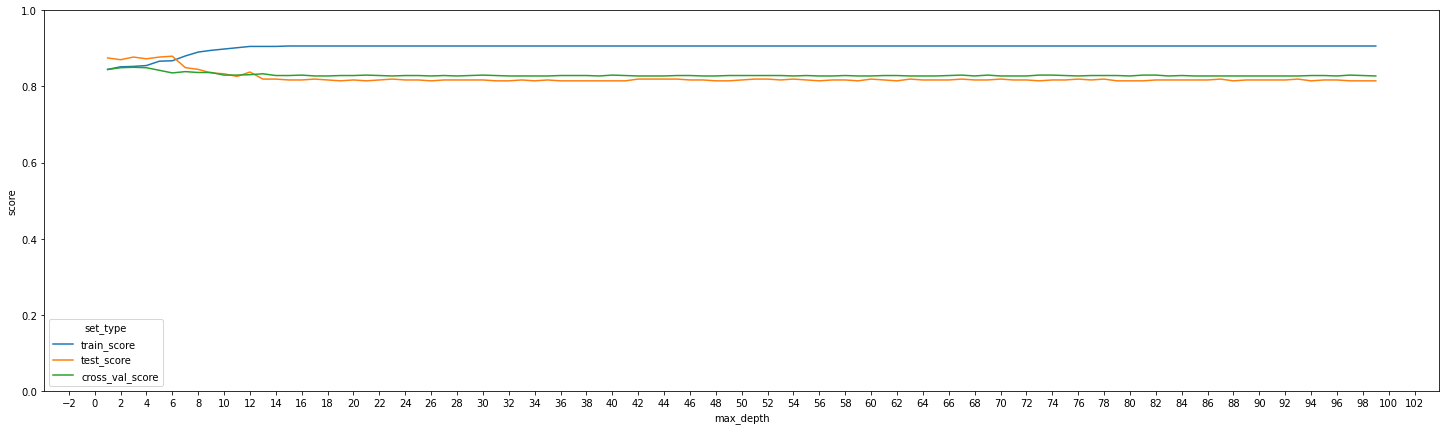

In [116]:
# переберем параметры глубины дерева
max_depth_values = range(1, 100)

train_score = []
test_score = []
cross_val_score_ = []

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(xtrain, ytrain)
    train_score.append(clf.score(xtrain, ytrain))
    cross_val_score_.append(cross_val_score(clf, xtrain, ytrain , cv = 5).mean())
    
    test_score.append(clf.score(xtest, ytest))
    
temp_score_data = pd.DataFrame({'max_depth': max_depth_values, 
                                'train_score': train_score, 
                                'test_score': test_score,
                                'cross_val_score':cross_val_score_})

scores_data_long = pd.melt(temp_score_data,
                           id_vars = ['max_depth'],
                           value_vars = ['train_score','test_score', 'cross_val_score'],
                           var_name = 'set_type',
                           value_name = 'score')


f, ax = plt.subplots(1, 1, figsize=(25, 7))
ax = sns.lineplot(data = scores_data_long, x='max_depth', y='score', hue='set_type')
num_ticks = 100
ax.locator_params(axis='x', nbins=num_ticks)
plt.ylim([0, 1])

<div class="alert alert-warning">
<h2> Метрики качества модели </h2>
</div>

**precision более важен в ситуациях, где не нужны ложные положительные срабатывания, а recall - там, где не нужны ложные отрицательные.**


Возможно чуть более понятная интерпретация этих метрик:
В поисковых системах, precision - соответствие выданной страницы запросу пользователя, а recall - доля выданных соответствующих страниц к доле всех соответствующих страниц.

Precision и recall не зависят, в отличие от accuracy, от соотношения классов и потому применимы в условиях несбалансированных выборок

- Если у нас precision > recall: у нашей модели высокая сенсетивность, у нее много ложных срабатываний
- Если кратко, то данные коэффициенты характеризуют два действия: перебдеть и недобдеть.
- То насколько хорошо у нас получается находить положительные примеры и не переплачивать ложными срабатываниями отвечат precision 
- То насколько хорошо у нас получается находить все положительные примеры  отвечат recall

Цель: Метрики продукты стали лучше

Тиндер: предсказать match:

- true positive : показали того человека, который понравился вам и вы ему понравились 
- true negative: : показали того человека, который не понравился вам и вы ему не понравились
- false positive : нашего человека все лайкают, а он никого 
 
 - `мы не должны допустить чтобы быстро ушел из-за быстрого матчинга или ушел потому что никто не лайкает `

**Вывод:**

Дерево решений - алгоритм машинного обучения для регрессии и классификации. Остановимся подробнее на задаче классификатора. В процессе построения дерева выбираются переменные разделение, по которым позволяет нам с большей точностью разделять исследуемые классы. В каждом листе дерева находится одно условие, которое разбивает наш набор данных на два подмножества.

Процесс выбора фичей, которые помещаются в лист дерева основывается на расчете Information gain. Могут использоваться и другие критерии.

По умолчанию классификатор строит настолько глубокое дерево, насколько позволяет набор данных. Таким образом, классификатор преследует цель безошибочно отнести к нужному классу все объекты в выборке. Такой "жадный" алгоритм может приводить к переобучению в результате избыточной глубины дерева.

Проверить насколько сильно переобучен классификатор можно обучив его на обучающей выборке затем проверить качество модели на тестовой выборке.
Основная цель построения любой модели - получить классификатор с максимальной обобщающей способностью, т.е. такой классификатор, который успешно выделяет общие закономерности и не переобучается на частных закономерностях в конкретной выборке.

Для этой цели мы подбираем оптимальный набор параметров классификатора, в случае дерева решений - это может быть глубина дерева. Для выбора оптимального параметра можно построить множество деревьев с разной глубиной и выбрать наилучший результат.

В качестве критерия "наилучшего" классификатора можно использовать кросс-валидацию. При таком подходе данные в выборке разбиваются на n частей, например на 5 частей, далее классификатор обучается на 4 частях данных и валидируется на оставшейся 5ой части. Затем операция повторяется, чтобы каждая из 5 частей данных оказалась в роли тестового множества.

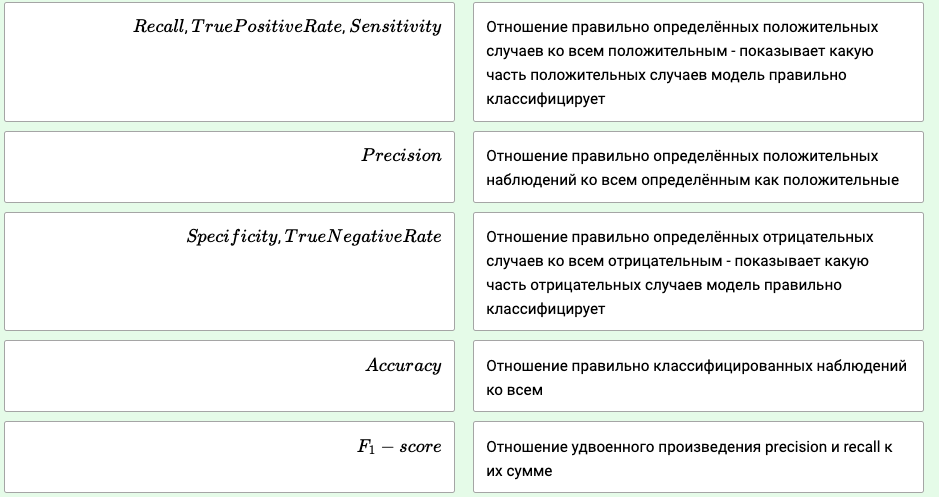

In [160]:
Image(filename='фото//output18.png')

In [117]:
'''
Задача 1
'''

'\nЗадача 1\n'

In [118]:
df1 = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')
test_data = pd.read_json('data//dataset_209691_15.txt')

X = df1.drop(['Вид'], axis=1)
y_dog = df1['Вид']

clf = tree.DecisionTreeClassifier(criterion='entropy')

dog = clf.fit(X, y_dog)
print(list(dog.predict(test_data)).count('собачка'))

53


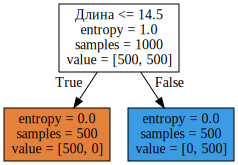

In [119]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(test_data), 
#                                     class_names=['котик', 'собачка'],
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

In [120]:
'''
Задача 2
'''

'\nЗадача 2\n'

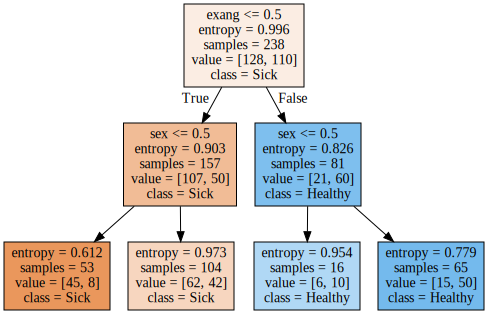

In [121]:
data = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_data_tree.csv')

X = data.drop('num', axis = 1)
y = data['num']


clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
clf.fit(X, y)

graph = Source(tree.export_graphviz(clf, out_file=None
                                    , feature_names=list(X)
                                    , class_names=['Sick', 'Healthy']
                                    , filled=True))

display(SVG(graph.pipe(format='svg')))

In [122]:
l_node = clf.tree_.children_left[0] # индекс корня левого поддерева
r_node = clf.tree_.children_right[0] # индекс корня правого поддерева

n1 = clf.tree_.n_node_samples[l_node] # сэмплов в левом поддереве
n2 = clf.tree_.n_node_samples[r_node] # сэмплов в правом поддереве

e1 = clf.tree_.impurity[l_node] # энтропия в корне левого поддерева
e2 = clf.tree_.impurity[r_node] # энтропия в корне правого поддерева

n = clf.tree_.n_node_samples[0] # суммарное кол-во сэмплов
e = clf.tree_.impurity[0] # энтропия корня дерева

average_child_enthropy = (e1*n1/n) + (e2*n2/n)

information_gain = e - average_child_enthropy
information_gain

0.11939340343891591

In [123]:
'''
Задача 3
'''


'\nЗадача 3\n'

In [124]:
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target
dt = tree.DecisionTreeClassifier(criterion='entropy')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75)
dt.fit(X_train, y_train)
predicted = dt.predict(X_test)

StratifiedKFold и cross_validate - аналоги, отличаются различием наблюдений в классах

ShuffleSplit и train_test_split - аналоги, отличаются числом случайных разделений

LeavePOut и LeaveOneOut - аналоги, в одном случае берется несколько наблюдений для теста, во втором одно

в обычном сплите получается всего 1 пара train и test datasets, в k-fold кросс-валидации их будет уже k, а в leave-one-out - по числу наблюдений.

In [125]:
'''
ML

То есть мы исследуем следующий сценарий: человек решает стэп, не может получить 
правильный ответ и больше не возвращается к практическим задачам. Что это за шаг такой,
который отпугнул максимальное число пользователей?
'''

'\nML\n\nТо есть мы исследуем следующий сценарий: человек решает стэп, не может получить \nправильный ответ и больше не возвращается к практическим задачам. Что это за шаг такой,\nкоторый отпугнул максимальное число пользователей?\n'

In [126]:
data_sub = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip',
                       compression ='zip', )

In [154]:
del b

In [150]:
wrong = data_sub[data_sub.submission_status == 'wrong'] \
            .pivot_table(index = ['user_id'], aggfunc = {'timestamp': 'max'} ) \
            .reset_index() \
            .rename(columns = {"timestamp" : 'timestamp_max_wrong'})

In [155]:
b = wrong.merge(data_sub, how = 'right')

In [ ]:
%timeit b['comp'] = b.apply(lambda x : x['timestamp'] < x['timestamp_max_wrong'], axis = 1)

In [157]:
%timeit b['comp2'] = b['timestamp'] < b['timestamp_max_wrong']

2.26 ms ± 240 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [148]:
b[b.comp].step_id.value_counts()
# 31978

31978    20476
32031    17834
32202    16521
31972    14604
32075    14266
         ...  
33681     2227
33984     2183
33998     2046
33874     1617
33890     1441
Name: step_id, Length: 76, dtype: int64

# Random forest, нейронные сети, финал

Дерево решений довольно глубокое не означает, что оно переобучено"

- max_depth - Максимальное число уровней дерева (максимальная длина пути от корня до листа)
- min_samples_split - Минимальное число образцов в узле, чтобы его можно было разделить на 2
- min_samples_leaf - Минимальное число образцов в листьях (при получившемся значении ниже разделение не будет произведено)
- min_impurity_decrease- Минимальное снижение "нечистоты" (смешения классов) узла при разделении, чтобы разделение произошло


`Малая глубина дерева препятствует переобучению`

`Чем больше значение min_samples_split, тем меньше тенденция к переобучению`

Если мы возьмём много частных решений и объединим  одно, то получим пример "мудрость толпы": каждое дерево переробучено на своих фичах (но не переоучено на всем датасете)

Обучение деревьев на бутстрапированной выборке со случайным сэмплом признаков, которое описывалось в предыдущих роликах, ближе к бэггингу над решающими деревьями, чем к случайному лесу

Random Forest отличается от бэггинга важной особенностью: при построении каждого разбиения узла в каждом дереве выбор оптимального признака, по которому будет осуществляться разбиение, происходит из случайной подвыборки всех признаков (в sklearn задается параметром max_features). При такой стратегии деревья ансамбля еще меньше похожи друг на друга, усреднение такие нескоррелированных моделей приводит к бОльшему приросту в качестве

`то есть берем случайную подвыборку для принятия решенения на узле`

Допустим, мы хотим построить 10 деревьев. Эти деревья будут построены совершенно независимо друг от друга, и алгоритм будет случайным образом отбирать признаки для построения каждого дерева, чтобы получить непохожие друг на друга деревья.


Для построения дерева мы сначала сформируем бутстреп-выборку (bootstrap sample) наших данных. То есть из n_samples примеров мы случайным образом выбираем пример с возвращением n_samples раз (поскольку отбор с возвращением, то один и тот же пример может быть выбран несколько раз). Мы получаем **выборку, которая имеет такой же размер, что и исходный набор данных, однако некоторые примеры будут отсутствовать в нем (примерно одна треть), а некоторые попадут в него несколько раз.**


 Далее на основе этой сформированной бутстреп-выборки строится дерево решений. Вместо поиска наилучшего теста для каждого узла, алгоритм для разбиения узла случайным образом отбирает подмножество признаков и затем находит наилучший тест, используя один из этих признаков. Количество отбираемых признаков контролируется параметром max_features. Отбор подмножества признаков повторяется отдельно для каждого узла, поэтому в каждом узле дерева может быть принято решение с использованием «своего» подмножества признаков.


Использование бутстрепа приводит к тому, что деревья решений в случайном лесе строятся на немного отличающихся между собой бутстреп-выборках.


Из-за случайного отбора признаков в каждом узле все расщепления в деревьях будут основано на отличающихся подмножествах признаков. Вместе эти два механизма приводят к тому, что все деревья в случайном лесе отличаются друг от друга.

Метод случайного леса (Random Forest) представляет собой дальнейшее улучшение бэггинга деревьев решений, которое заключается в устранении корреляции между деревьями. 

**The difference is at the node level splitting for both. So Bagging algorithm using a decision tree would use all the features to decide the best split. On the other hand, the trees built in Random forest use a random subset of the features at every node, to decide the best split.**

In [238]:
lf_rf = RandomForestClassifier(random_state=0)
parametrs = {'n_estimators': [10, 20, 30,40], 
             'max_depth': [1, 3, 5, 7,9,11],
             'min_samples_leaf': [1, 2, 3, 4,5,6], 
             'min_samples_split': [2, 4, 6, 8]}
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=3)

grid_search_cv_clf.fit(X_test, y_test)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 20, 30, 40]})

In [240]:
# Return the mean accuracy on the given test data and labels.
grid_search_cv_clf.best_estimator_.score(X_test, y_test)

0.9736842105263158

In [241]:
feature_importances = grid_search_cv_clf.best_estimator_.feature_importances_
feature_importances

array([0.06666667, 0.03333333, 0.4       , 0.5       ])

In [242]:
# визуализация 
feature_importances_df = pd.DataFrame({'features':  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
                                    'feature_importances': feature_importances})
feature_importances_df.sort_values('feature_importances', ascending=False, inplace=True)

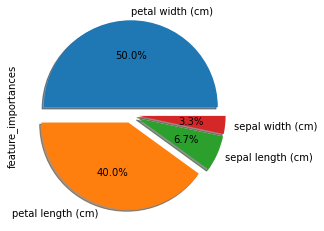

In [243]:
feature_importances_df.plot.pie(
                            explode=[0.09]*4,
                            labels = feature_importances_df.features,
                            y = 'feature_importances',
                            autopct='%1.1f%%',
                            shadow=True,
                            legend=False,
                            figsize=(4, 4));

In [244]:
feature_importances_df

,features,feature_importances
3,petal width (cm),0.500000
2,petal length (cm),0.400000
0,sepal length (cm),0.066667
1,sepal width (cm),0.033333


<AxesSubplot:xlabel='feature_importances', ylabel='features'>

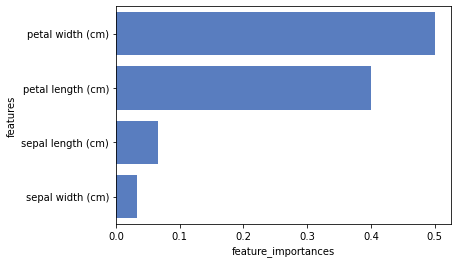

In [245]:
sns.set_color_codes("muted")
sns.barplot(x="feature_importances", y="features", data=feature_importances_df,
            label="importance", color="b")

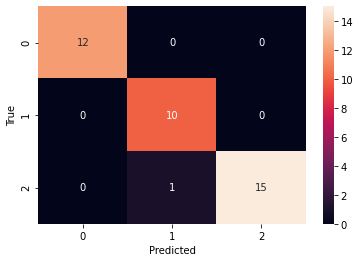

In [246]:
y_pred = grid_search_cv_clf.best_estimator_.predict(X_test)

confusion_matrix_tbl_grid = confusion_matrix(y_pred, y_test)
sns.heatmap(confusion_matrix_tbl_grid, annot=True,  fmt='.4g',)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
plt.show()

Предсказания, которые дают модели, это уже хорошо, однако не всегда достаточно. С разными усилиями, мы также можем извлечь важность переменных для осуществления предсказания. Это особенно интересно в науке, где мы пытаемся выявить причинно-следственные связи (хотя, от важности переменных до проверки этих связей ещё длинный путь). Из Decision Tree и Random Forest легко вытащить важность переменных для предсказания, но есть одна особенность. При высокой скореллированности нескольких переменных сплит по любой из них может давать одинаковый Information Gain, и выбор будет сделан случайно. То есть, важность фичей может изменяться в зависимости от выбора из равноценных в процессе обучения. Поэтому следует смотреть на корреляцию между переменными перед обучением, чтобы лучше представлять данные.

In [ ]:
'''
Задание1
'''

In [232]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')
df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,2,0,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,3,1,0
6089,3,2,2,0,2,1,0,1,0,1,...,6,7,0,2,1,0,7,4,0,1
6090,5,2,3,0,1,1,0,1,9,0,...,7,7,0,2,1,4,3,4,0,1
6091,3,2,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0


In [247]:
lf_rf = RandomForestClassifier(random_state=0)
parametrs = {'n_estimators': [10, 20, 30,40], 
             'max_depth': [1, 3, 5, 7,9,11],
             'min_samples_leaf': [1, 2, 3, 4,5,6], 
             'min_samples_split': [2, 4, 6, 8]}
grid_search_cv_clf = GridSearchCV(lf_rf, 
                                  parametrs, cv=3,
#                                   чтобы ускорить процесс
                                     n_jobs=-1)

grid_search_cv_clf.fit(df.drop('class', axis =1), df['class'])

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 20, 30, 40]})

In [249]:
grid_search_cv_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [252]:
feature_importances = grid_search_cv_clf.best_estimator_.feature_importances_
feature_importances

array([0.00257742, 0.00312957, 0.02177298, 0.07010933, 0.18837641,
       0.        , 0.0808402 , 0.06846076, 0.10386114, 0.00756262,
       0.10379322, 0.03180155, 0.04829594, 0.01768932, 0.00625335,
       0.        , 0.0108812 , 0.0139101 , 0.07072612, 0.08356419,
       0.04378343, 0.02261118])

In [250]:
namw  = df.drop('class', axis =1).columns

In [253]:
# визуализация 
feature_importances_df = pd.DataFrame({'features':  namw,
                                    'feature_importances': feature_importances})
feature_importances_df.sort_values('feature_importances', ascending=False, inplace=True)

<AxesSubplot:xlabel='feature_importances', ylabel='features'>

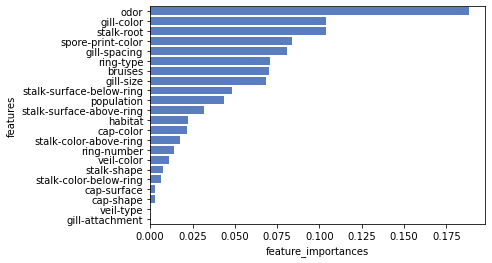

In [254]:
sns.set_color_codes("muted")
sns.barplot(x="feature_importances", y="features", data=feature_importances_df,
            label="importance", color="b")

In [257]:
v = ['cap-surface > odor > gill-attachment',
     'odor > population > gill-attachment',
     'stalk-color-below-ring > stalk-root > odor',
     'habitat > stalk-shape > odor']

for var in v:
    feats = [s.strip() for s in var.split('>')]
    imps = [feature_importances_df[feature_importances_df.features == feats[i]]['feature_importances'].item() for i in (0, 1, 2)]
    print('+', var) if imps[0] > imps[1] > imps[2] else print('-', var)

- cap-surface > odor > gill-attachment
+ odor > population > gill-attachment
- stalk-color-below-ring > stalk-root > odor
- habitat > stalk-shape > odor


In [292]:
test = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')
y_pred = grid_search_cv_clf.predict(test)

In [271]:
%timeit len([i for i in y_pred if i == 1])

530 µs ± 44.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [272]:
%timeit  grid_search_cv_clf.predict(test).sum()

6.8 ms ± 1.72 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
'''
Задание2
'''

In [305]:
import requests, zipfile, io 
import pandas as pd
password ='Cool!Move_forward!'
url = "https://stepik.org/media/attachments/course/4852/testing_y_mush.csv.zip"
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
txtfiles = z.namelist()
right_mush = pd.read_csv(z.open(txtfiles[0], "r", pwd=password.encode('cp850', 'replace')))

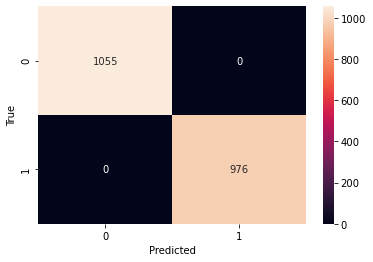

In [306]:

confusion_matrix_tbl_grid = confusion_matrix(y_pred, right_mush)
sns.heatmap(confusion_matrix_tbl_grid, annot=True,  fmt='.4g',)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
plt.show()

In [ ]:
'''
Задание3
'''

In [360]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')
y_test= pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')


transport = {'transport' :  0,  'fighter' :  1,  'cruiser' : 2}

df['class'] = df['class'].map(transport)

In [343]:
X = df.iloc[:,1: ]
y = df[['class']]

In [326]:
lf_rf = RandomForestClassifier(random_state=0)
parametrs = {'n_estimators': [10, 20, 30,40], 
             'max_depth': [1, 3, 5, 7,9,11],
             'min_samples_leaf': [1, 2, 3, 4,5,6], 
             'min_samples_split': [2, 4, 6, 8]}
grid_search_cv_clf = GridSearchCV(lf_rf, 
                                  parametrs, cv=3,
#                                   чтобы ускорить процесс
                                     n_jobs=-1)

In [344]:
grid_search_cv_clf.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 20, 30, 40]})

In [346]:
predictions = grid_search_cv_clf.predict(y_test)
pd.Series(predictions).value_counts()

1    675
0    595
2    230
dtype: int64

In [351]:
feature_importances = grid_search_cv_clf.best_estimator_.feature_importances_
# визуализация 
feature_importances_df = pd.DataFrame({'features':  X.columns,
                                    'feature_importances': feature_importances})
feature_importances_df.sort_values('feature_importances', ascending=False, inplace=True)

In [353]:
X.columns

Index(['g_reflection', 'i_reflection', 'speed', 'brightness',
       'time_of_observance', 'volume'],
      dtype='object')

<AxesSubplot:xlabel='feature_importances', ylabel='features'>

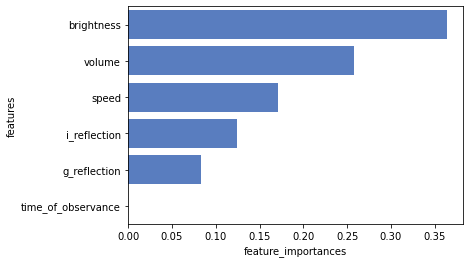

In [352]:
sns.set_color_codes("muted")
sns.barplot(x="feature_importances", y="features", data=feature_importances_df,
            label="importance", color="b")

In [362]:

%time df.apply(np.mean)

%time df.apply('mean')

%time df.describe().loc['mean']

%time df.mean(axis=0)

CPU times: user 2.97 ms, sys: 1.57 ms, total: 4.54 ms
Wall time: 3.93 ms
CPU times: user 2.47 ms, sys: 1 µs, total: 2.47 ms
Wall time: 2.48 ms
CPU times: user 29.9 ms, sys: 352 µs, total: 30.3 ms
Wall time: 32.9 ms
CPU times: user 2.13 ms, sys: 81 µs, total: 2.21 ms
Wall time: 2.15 ms


class                      0.730000
g_reflection               7.514471
i_reflection               6.782598
speed                    225.959106
brightness                 0.335078
time_of_observance    293557.236000
volume                    81.336123
dtype: float64

In [366]:
# итерирование по строкам дтафрейма
for i, row in df.iterrows():
    print(row)
    break

class                      0.000000
g_reflection               2.190672
i_reflection               6.716633
speed                     62.168208
brightness                 0.347465
time_of_observance    158221.000000
volume                    44.932446
Name: 0, dtype: float64


In [ ]:
# applymap - применяет функцию котору ему передали ко всем строкам в датафрейме
# trancform 

In [ ]:
# resample  - изменить частотность данных: от минут к дням и наоборот
# rolling - скользящее среднее с параметром min_perionds =1 
# expanding - скользящее среднее за 1, 2, 3 ...дней
# ewm - экспотенциальное взвешивание 
# к index который предствлен датай можно обращаться при помощи методов которые связаны с датой (день недели и проч)